# **Data Understanding**

## **Data Explorations**

Untuk dapat memahami data, kita perlu melakukan explorasi terhadap data-data yang akan digunakan.

Untuk melakukan hal tersebut, kita tentu perlu melakukan import beberapa librari dasar yang dibutuhkan.

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
from pandas.errors import SettingWithCopyWarning
warnings.filterwarnings('ignore', category=SettingWithCopyWarning)

Tentukan nama variabel untuk setiap data yang akan digunakan.

In [2]:
movie = pd.read_csv('/Users/tonisuhendar/One-Hour/learn-ds/dataset/letterboxd-movie/movie_data.csv')
rating = pd.read_csv('/Users/tonisuhendar/One-Hour/learn-ds/dataset/letterboxd-movie/ratings_export.csv')
user = pd.read_csv('/Users/tonisuhendar/One-Hour/learn-ds/dataset/letterboxd-movie/users_export.csv')

### **Univariate Exploratory Data Analysis**

#### **Movie Variable**

Menampilkan sebagian baris data dari variabel `Movie`

In [3]:
movie

,_id,genres,image_url,imdb_id,imdb_link,movie_id,movie_title,original_language,overview,popularity,production_countries,release_date,runtime,spoken_languages,tmdb_id,tmdb_link,vote_average,vote_count,year_released
0,5fc85f606758f69634496fd3,"[""Music"",""Animation""]",film-poster/4/6/4/4/4/0/464440-football-freaks...,NaN,NaN,football-freaks,Football Freaks,en,"Football crazy, football mad. Don’t watch this...",0.600,"[""United Kingdom""]",1971-12-05,0.0,[],535272.0,https://www.themoviedb.org/movie/535272/,0.0,0.0,1971.0
1,5fc85ff26758f696344ace0c,[],film-poster/2/4/5/5/0/0/245500-aftermath-0-230...,tt0586129,http://www.imdb.com/title/tt0586129/maindetails,aftermath-1960,Aftermath,en,Aftermath was the pilot for an unsold TV serie...,0.600,[],1960-04-17,22.0,[],318331.0,https://www.themoviedb.org/movie/318331/,8.0,1.0,1960.0
2,5fc85f606758f69634496fcd,"[""Drama""]",film-poster/9/3/3/1/8/93318-where-chimneys-are...,tt0045731,http://www.imdb.com/title/tt0045731/maindetails,where-chimneys-are-seen,Where Chimneys Are Seen,ja,Gosho’s most celebrated film both in Japan and...,1.568,"[""Japan""]",1953-03-05,108.0,"[""日本語""]",117779.0,https://www.themoviedb.org/movie/117779/,6.6,10.0,1953.0
3,5fc85f606758f69634496fd1,"[""Drama""]",NaN,tt0187327,http://www.imdb.com/title/tt0187327/maindetails,the-musicians-daughter,The Musician's Daughter,en,Carl Wagner's good wife was dying. His heart b...,0.600,"[""United States of America""]",1911-12-12,15.0,[],560377.0,https://www.themoviedb.org/movie/560377/,0.0,0.0,1911.0
4,5fc85f606758f69634496fd4,"[""Documentary""]",film-poster/4/5/4/6/0/3/454603-50-years-of-fab...,tt4769914,http://www.imdb.com/title/tt4769914/maindetails,50-years-of-fabulous,50 Years of Fabulous,en,50 Years of Fabulous recounts the rich history...,0.600,[],2018-05-17,75.0,[],525187.0,https://www.themoviedb.org/movie/525187/,0.0,0.0,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285958,6239f32da936b95600b301d8,NaN,NaN,NaN,NaN,the-western-world-of-sailor-moon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285959,6239f32da936b95600b301e8,NaN,NaN,NaN,NaN,shadowplay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285960,6239f32da936b95600b301f2,NaN,NaN,NaN,NaN,only-always-you,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285961,6239f32da936b95600b301fb,NaN,NaN,NaN,NaN,one-night-stand-ellen-degeneres,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Melihat informasi dari variabel `Movie`

In [4]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285963 entries, 0 to 285962
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   _id                   285963 non-null  object 
 1   genres                274986 non-null  object 
 2   image_url             264521 non-null  object 
 3   imdb_id               243898 non-null  object 
 4   imdb_link             243914 non-null  object 
 5   movie_id              285616 non-null  object 
 6   movie_title           283453 non-null  object 
 7   original_language     274986 non-null  object 
 8   overview              261362 non-null  object 
 9   popularity            274872 non-null  float64
 10  production_countries  274854 non-null  object 
 11  release_date          270954 non-null  object 
 12  runtime               269943 non-null  float64
 13  spoken_languages      274758 non-null  object 
 14  tmdb_id               279803 non-null  float64
 15  

Mengambil fitu-fitur yang akan digunakan dari variabel `Movie`

In [5]:
movie = movie[['movie_id','movie_title','genres','original_language','spoken_languages','production_countries','year_released','popularity']]
movie

,movie_id,movie_title,genres,original_language,spoken_languages,production_countries,year_released,popularity
0,football-freaks,Football Freaks,"[""Music"",""Animation""]",en,[],"[""United Kingdom""]",1971.0,0.600
1,aftermath-1960,Aftermath,[],en,[],[],1960.0,0.600
2,where-chimneys-are-seen,Where Chimneys Are Seen,"[""Drama""]",ja,"[""日本語""]","[""Japan""]",1953.0,1.568
3,the-musicians-daughter,The Musician's Daughter,"[""Drama""]",en,[],"[""United States of America""]",1911.0,0.600
4,50-years-of-fabulous,50 Years of Fabulous,"[""Documentary""]",en,[],[],2018.0,0.600
...,...,...,...,...,...,...,...,...
285958,the-western-world-of-sailor-moon,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285959,shadowplay,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285960,only-always-you,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285961,one-night-stand-ellen-degeneres,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Mengganti nilai `[]` menjadi  nilai `NaN`

In [6]:
movie = movie.replace('[]', np.nan)
movie

,movie_id,movie_title,genres,original_language,spoken_languages,production_countries,year_released,popularity
0,football-freaks,Football Freaks,"[""Music"",""Animation""]",en,NaN,"[""United Kingdom""]",1971.0,0.600
1,aftermath-1960,Aftermath,NaN,en,NaN,NaN,1960.0,0.600
2,where-chimneys-are-seen,Where Chimneys Are Seen,"[""Drama""]",ja,"[""日本語""]","[""Japan""]",1953.0,1.568
3,the-musicians-daughter,The Musician's Daughter,"[""Drama""]",en,NaN,"[""United States of America""]",1911.0,0.600
4,50-years-of-fabulous,50 Years of Fabulous,"[""Documentary""]",en,NaN,NaN,2018.0,0.600
...,...,...,...,...,...,...,...,...
285958,the-western-world-of-sailor-moon,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285959,shadowplay,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285960,only-always-you,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285961,one-night-stand-ellen-degeneres,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Deteksi nilai yang hilang

In [7]:
movie.isna().sum()

movie_id                  433
movie_title              2510
genres                  63323
original_language       10977
spoken_languages        79323
production_countries    81765
year_released            8127
popularity              11091
dtype: int64

Menghapus nilai yang hilang

In [8]:
movie = movie.dropna()
movie

,movie_id,movie_title,genres,original_language,spoken_languages,production_countries,year_released,popularity
2,where-chimneys-are-seen,Where Chimneys Are Seen,"[""Drama""]",ja,"[""日本語""]","[""Japan""]",1953.0,1.568
5,where-love-has-gone,Where Love Has Gone,"[""Romance""]",en,"[""English""]","[""United States of America""]",1964.0,2.304
9,sharing-the-secret,Sharing the Secret,"[""Drama""]",en,"[""English""]","[""United States of America""]",2000.0,3.531
11,blood-scarab,Blood Scarab,"[""Horror""]",en,"[""English""]","[""United States of America""]",2008.0,3.553
12,the-christine-jorgensen-story,The Christine Jorgensen Story,"[""Drama""]",en,"[""English""]","[""United States of America""]",1970.0,1.708
...,...,...,...,...,...,...,...,...
285942,my-daughters-double-life-2021,My Daughter's Double Life,"[""Thriller"",""TV Movie""]",en,"[""English""]","[""United States of America""]",2021.0,2.814
285943,brave-gunjo-senki,Brave: Gunjō senki,"[""Action"",""History""]",ja,"[""日本語""]","[""Japan""]",2021.0,4.678
285946,ignore-it,Ignore It,"[""Horror""]",en,"[""English""]","[""United States of America""]",2021.0,0.600
285948,frederick-douglass-in-five-speeches,Frederick Douglass: In Five Speeches,"[""Documentary"",""History""]",en,"[""English""]","[""United States of America""]",2022.0,6.003


Menghapus nilai `[]` dan `""` yang terdapat pada setiap fitur

In [9]:
movie = movie.applymap(lambda x: re.sub(r'[\[\]]', '', re.sub(r'"(.*?)"', r"\1", str(x))))
movie = movie.reset_index(drop=True)
movie

,movie_id,movie_title,genres,original_language,spoken_languages,production_countries,year_released,popularity
0,where-chimneys-are-seen,Where Chimneys Are Seen,Drama,ja,日本語,Japan,1953.0,1.568
1,where-love-has-gone,Where Love Has Gone,Romance,en,English,United States of America,1964.0,2.304
2,sharing-the-secret,Sharing the Secret,Drama,en,English,United States of America,2000.0,3.531
3,blood-scarab,Blood Scarab,Horror,en,English,United States of America,2008.0,3.553
4,the-christine-jorgensen-story,The Christine Jorgensen Story,Drama,en,English,United States of America,1970.0,1.708
...,...,...,...,...,...,...,...,...
170831,my-daughters-double-life-2021,My Daughter's Double Life,"Thriller,TV Movie",en,English,United States of America,2021.0,2.814
170832,brave-gunjo-senki,Brave: Gunjō senki,"Action,History",ja,日本語,Japan,2021.0,4.678
170833,ignore-it,Ignore It,Horror,en,English,United States of America,2021.0,0.6
170834,frederick-douglass-in-five-speeches,Frederick Douglass: In Five Speeches,"Documentary,History",en,English,United States of America,2022.0,6.003


Deteksi nilai yang hilang

In [10]:
movie.isna().sum()

movie_id                0
movie_title             0
genres                  0
original_language       0
spoken_languages        0
production_countries    0
year_released           0
popularity              0
dtype: int64

Deteksi nilai yang unik

In [11]:
movie.nunique()

movie_id                170836
movie_title             149052
genres                    7930
original_language          143
spoken_languages          4030
production_countries      6167
year_released              148
popularity               16638
dtype: int64

Visualisasi judul film menggunakan librari wordcloud

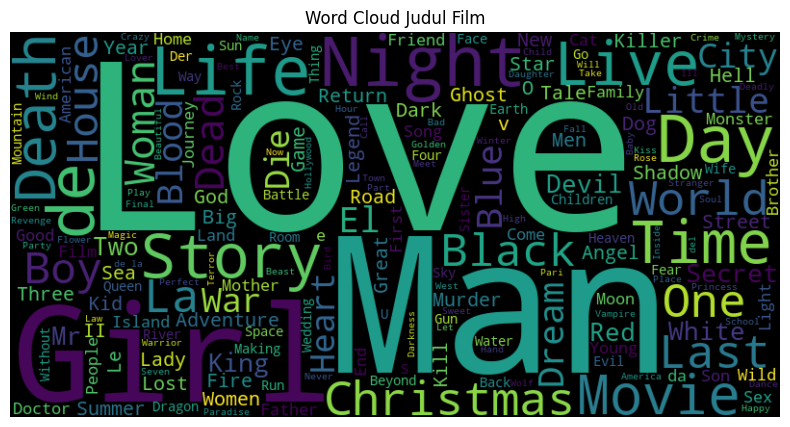

In [12]:
from wordcloud import WordCloud

# Data movie_title
movie_titles = movie['movie_title']

# Menggabungkan semua judul film menjadi satu string
text = ' '.join(movie_titles)

# Membuat Word Cloud
wordcloud = WordCloud(width=800, height=400).generate(text)

# Menampilkan Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Judul Film')
plt.show()

#### **Rating Variable**

Menampilkan sebagian baris data dari variabel `Rating`

In [13]:
rating

,_id,movie_id,rating_val,user_id
0,5fc57c5d6758f6963451a07f,feast-2014,7,deathproof
1,5fc57c5d6758f6963451a063,loving-2016,7,deathproof
2,5fc57c5d6758f6963451a0ef,scripted-content,7,deathproof
3,5fc57c5d6758f6963451a060,the-future,4,deathproof
4,5fc57c5c6758f69634519398,mank,5,deathproof
...,...,...,...,...
11078162,6239f4f1a936b95600b3d798,alien-3,6,turnitip
11078163,6239f4f1a936b95600b3d799,battleship-potemkin,7,turnitip
11078164,6239f4f1a936b95600b3d79e,pusher,6,turnitip
11078165,6239f4f1a936b95600b3d7a1,wild-strawberries,7,turnitip


Menghapus fitur yang tidak diinginkan

In [14]:
rating = rating.drop('_id', axis=1)
rating

,movie_id,rating_val,user_id
0,feast-2014,7,deathproof
1,loving-2016,7,deathproof
2,scripted-content,7,deathproof
3,the-future,4,deathproof
4,mank,5,deathproof
...,...,...,...
11078162,alien-3,6,turnitip
11078163,battleship-potemkin,7,turnitip
11078164,pusher,6,turnitip
11078165,wild-strawberries,7,turnitip


Melihat informasi pada variabel `Rating`

In [15]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11078167 entries, 0 to 11078166
Data columns (total 3 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   movie_id    object
 1   rating_val  int64 
 2   user_id     object
dtypes: int64(1), object(2)
memory usage: 253.6+ MB


Deteksi nilai yang hilang

In [16]:
rating.isna().sum()

movie_id      6
rating_val    0
user_id       0
dtype: int64

Mengatasi nilai yang hilang dengan metode drop kemudian memvalidasinya

In [17]:
rating = rating.dropna()
rating.isna().sum()

movie_id      0
rating_val    0
user_id       0
dtype: int64

In [18]:
rating

,movie_id,rating_val,user_id
0,feast-2014,7,deathproof
1,loving-2016,7,deathproof
2,scripted-content,7,deathproof
3,the-future,4,deathproof
4,mank,5,deathproof
...,...,...,...
11078162,alien-3,6,turnitip
11078163,battleship-potemkin,7,turnitip
11078164,pusher,6,turnitip
11078165,wild-strawberries,7,turnitip


Visualisasi rating

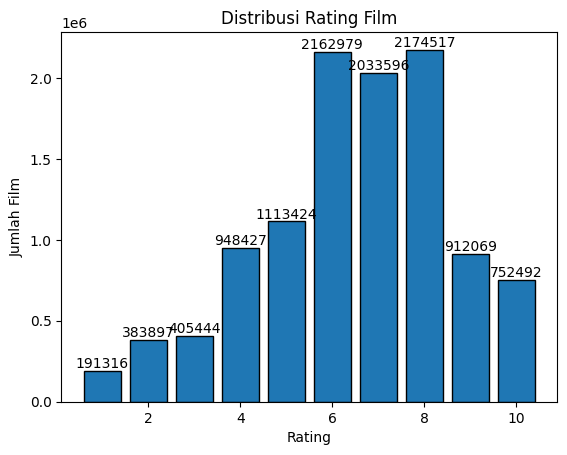

In [ ]:
# Data rating_val
rating_val = rating['rating_val']

# Menghitung jumlah film dalam setiap rating
rating_counts = rating_val.value_counts().sort_index()

# Membuat bar plot
plt.bar(rating_counts.index, rating_counts.values, edgecolor='black')

# Memberikan judul dan label pada sumbu-sumbu
plt.title('Distribusi Rating Film')
plt.xlabel('Rating')
plt.ylabel('Jumlah Film')

# Menambahkan label nilai pada setiap bar
for i, count in enumerate(rating_counts.values):
    plt.text(rating_counts.index[i], count, str(count), ha='center', va='bottom')

# Menampilkan bar plot
plt.show()

#### **User Variable**

Menampilkan sebagian baris data dari variabel `User`

In [20]:
user

,_id,display_name,num_ratings_pages,num_reviews,username
0,5fc4172ec6cd28ebd99dd0e2,Lucy,32.0,1650,deathproof
1,5fc4172ec6cd28ebd99dd0ea,Matt Singer,52.0,1915,superpulse
2,5fc4172ec6cd28ebd99dd0ed,Sean Baker,21.0,1283,lilfilm
3,5fc4172ec6cd28ebd99dd0ee,iana,37.0,1177,ianamurray
4,5fc419171ebf67b9fbe48615,Lizzy,57.0,1810,punchdrunklizzy
...,...,...,...,...,...
8134,6239b430a936b956009c993c,Máté Turi-Mészáros,NaN,237,mateazember
8135,6239cbf7a936b95600a2d24c,Finn,NaN,297,finnvor1
8136,6239d254a936b95600a4472f,Daniel,NaN,1231,daniel
8137,6239df37a936b95600aa7aa5,ButterflyFilms,NaN,800,butterflyfilms


Melihat informasi variabel `User`

In [21]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8139 entries, 0 to 8138
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   _id                8139 non-null   object 
 1   display_name       7832 non-null   object 
 2   num_ratings_pages  4747 non-null   float64
 3   num_reviews        8139 non-null   int64  
 4   username           8139 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 318.1+ KB


Deteksi nilai yang hilang

In [22]:
user.isna().sum()

_id                     0
display_name          307
num_ratings_pages    3392
num_reviews             0
username                0
dtype: int64

## **Data Preprocessing**

Menggabungkan variabel yang akan digunakan untuk tahap pemodelan yaitu variabel `movie` dan `rating`

In [23]:
dataset = movie
dataset = pd.merge(rating, dataset, on='movie_id', how='left')
dataset

,movie_id,rating_val,user_id,movie_title,genres,original_language,spoken_languages,production_countries,year_released,popularity
0,feast-2014,7,deathproof,Feast,"Animation,Comedy,Drama,Family",en,English,United States of America,2014.0,9.26
1,loving-2016,7,deathproof,Loving,"Romance,Drama",en,English,"United Kingdom,United States of America",2016.0,18.024
2,scripted-content,7,deathproof,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,the-future,4,deathproof,The Future,"Drama,Fantasy,Romance",en,English,"Germany,United States of America,France,United...",2011.0,5.208
4,mank,5,deathproof,Mank,"Drama,History",en,English,United States of America,2020.0,16.331
...,...,...,...,...,...,...,...,...,...,...
11078156,alien-3,6,turnitip,Alien³,"Science Fiction,Action,Horror",en,English,"United Kingdom,United States of America",1992.0,22.524
11078157,battleship-potemkin,7,turnitip,Battleship Potemkin,"Drama,History",ru,No Language,Soviet Union,1925.0,8.771
11078158,pusher,6,turnitip,Pusher,"Action,Crime,Drama,Thriller",da,"Dansk,Srpski,svenska",Denmark,1996.0,6.615
11078159,wild-strawberries,7,turnitip,Wild Strawberries,Drama,sv,"Latin,svenska",Sweden,1957.0,13.574


Mengurutkan ulang fitur-fitur pada variabel `dataset` supaya lebih enak dibaca

In [24]:
dataset = dataset[['user_id','rating_val','movie_id','movie_title','genres','original_language','spoken_languages','production_countries','year_released','popularity']]
dataset

,user_id,rating_val,movie_id,movie_title,genres,original_language,spoken_languages,production_countries,year_released,popularity
0,deathproof,7,feast-2014,Feast,"Animation,Comedy,Drama,Family",en,English,United States of America,2014.0,9.26
1,deathproof,7,loving-2016,Loving,"Romance,Drama",en,English,"United Kingdom,United States of America",2016.0,18.024
2,deathproof,7,scripted-content,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,deathproof,4,the-future,The Future,"Drama,Fantasy,Romance",en,English,"Germany,United States of America,France,United...",2011.0,5.208
4,deathproof,5,mank,Mank,"Drama,History",en,English,United States of America,2020.0,16.331
...,...,...,...,...,...,...,...,...,...,...
11078156,turnitip,6,alien-3,Alien³,"Science Fiction,Action,Horror",en,English,"United Kingdom,United States of America",1992.0,22.524
11078157,turnitip,7,battleship-potemkin,Battleship Potemkin,"Drama,History",ru,No Language,Soviet Union,1925.0,8.771
11078158,turnitip,6,pusher,Pusher,"Action,Crime,Drama,Thriller",da,"Dansk,Srpski,svenska",Denmark,1996.0,6.615
11078159,turnitip,7,wild-strawberries,Wild Strawberries,Drama,sv,"Latin,svenska",Sweden,1957.0,13.574


## **Data Preparation**

Deteksi nilai yang hilang

In [25]:
dataset.isna().sum()

user_id                      0
rating_val                   0
movie_id                     0
movie_title             574111
genres                  574111
original_language       574111
spoken_languages        574111
production_countries    574111
year_released           574111
popularity              574111
dtype: int64

Menghapus data yang hilang dan memvalidasinya

In [26]:
dataset = dataset.dropna()
dataset.isna().sum()

user_id                 0
rating_val              0
movie_id                0
movie_title             0
genres                  0
original_language       0
spoken_languages        0
production_countries    0
year_released           0
popularity              0
dtype: int64

In [27]:
dataset

,user_id,rating_val,movie_id,movie_title,genres,original_language,spoken_languages,production_countries,year_released,popularity
0,deathproof,7,feast-2014,Feast,"Animation,Comedy,Drama,Family",en,English,United States of America,2014.0,9.26
1,deathproof,7,loving-2016,Loving,"Romance,Drama",en,English,"United Kingdom,United States of America",2016.0,18.024
3,deathproof,4,the-future,The Future,"Drama,Fantasy,Romance",en,English,"Germany,United States of America,France,United...",2011.0,5.208
4,deathproof,5,mank,Mank,"Drama,History",en,English,United States of America,2020.0,16.331
5,deathproof,5,embers-2015,Embers,"Drama,Science Fiction",en,English,"Poland,United States of America",2015.0,4.55
...,...,...,...,...,...,...,...,...,...,...
11078156,turnitip,6,alien-3,Alien³,"Science Fiction,Action,Horror",en,English,"United Kingdom,United States of America",1992.0,22.524
11078157,turnitip,7,battleship-potemkin,Battleship Potemkin,"Drama,History",ru,No Language,Soviet Union,1925.0,8.771
11078158,turnitip,6,pusher,Pusher,"Action,Crime,Drama,Thriller",da,"Dansk,Srpski,svenska",Denmark,1996.0,6.615
11078159,turnitip,7,wild-strawberries,Wild Strawberries,Drama,sv,"Latin,svenska",Sweden,1957.0,13.574


Deteksi data unik

In [28]:
dataset.nunique()

user_id                   7472
rating_val                  10
movie_id                170836
movie_title             149052
genres                    7930
original_language          143
spoken_languages          4030
production_countries      6167
year_released              148
popularity               16638
dtype: int64

Deteksi data duplikat

In [29]:
dataset.duplicated().sum()

0

## **Modeling**

### **Content Based Filtering**

Membuat variabel baru untuk modeling dengan teknik content based filtering

In [30]:
cbf_df = dataset[['movie_id','genres']]
cbf_df

,movie_id,genres
0,feast-2014,"Animation,Comedy,Drama,Family"
1,loving-2016,"Romance,Drama"
3,the-future,"Drama,Fantasy,Romance"
4,mank,"Drama,History"
5,embers-2015,"Drama,Science Fiction"
...,...,...
11078156,alien-3,"Science Fiction,Action,Horror"
11078157,battleship-potemkin,"Drama,History"
11078158,pusher,"Action,Crime,Drama,Thriller"
11078159,wild-strawberries,Drama


Deteksi data unik

In [31]:
cbf_df.nunique()

movie_id    170836
genres        7930
dtype: int64

Deteksi data duplikat

In [32]:
cbf_df.duplicated().sum()

10333214

Menghapus data duplikat

In [33]:
cbf_df = cbf_df.drop_duplicates()

Deteksi nilai yang hilang

In [34]:
cbf_df.isna().sum()

movie_id    0
genres      0
dtype: int64

Melihat sebagian data dari variabel `df`

In [35]:
cbf_df

,movie_id,genres
0,feast-2014,"Animation,Comedy,Drama,Family"
1,loving-2016,"Romance,Drama"
3,the-future,"Drama,Fantasy,Romance"
4,mank,"Drama,History"
5,embers-2015,"Drama,Science Fiction"
...,...,...
11075441,my-daughters-double-life-2021,"Thriller,TV Movie"
11075445,brave-gunjo-senki,"Action,History"
11076084,ignore-it,Horror
11076354,frederick-douglass-in-five-speeches,"Documentary,History"


Mengganti ruang kosong(spasi) dengan `_`

In [36]:
cbf_df = cbf_df.applymap(lambda x: re.sub(r'\s+', '_', str(x)))
cbf_df

,movie_id,genres
0,feast-2014,"Animation,Comedy,Drama,Family"
1,loving-2016,"Romance,Drama"
3,the-future,"Drama,Fantasy,Romance"
4,mank,"Drama,History"
5,embers-2015,"Drama,Science_Fiction"
...,...,...
11075441,my-daughters-double-life-2021,"Thriller,TV_Movie"
11075445,brave-gunjo-senki,"Action,History"
11076084,ignore-it,Horror
11076354,frederick-douglass-in-five-speeches,"Documentary,History"


Menerapkan teknik Simple Random Sampling untuk mengurangi jumlah sampel

In [37]:
# Menentukan ukuran sampel yang diinginkan
ukuran_sampel = int(len(cbf_df) * 0.37)

# Melakukan Simple Random Sampling
cbf_df = cbf_df.sample(n=ukuran_sampel, random_state=100623)
cbf_df # 63209

,movie_id,genres
5838673,les-luthiers-viegesimo-aniversario,Comedy
10854741,beginning-of-fashion,"Animation,Comedy"
5349464,flight-for-freedom,Drama
123921,w-o-ram,"Thriller,Crime"
369609,angie,"Comedy,Drama,Romance"
...,...,...
379244,d-is-for-deloused,"Animation,Horror"
1217096,only-the-animals,"Thriller,Drama"
6375533,twilight-storytellers-the-groundskeeper,"Drama,Fantasy"
2033782,surprise-me-2017,Romance


#### TfidfVectorizer & Cosimilarity

Mengekstraksi fitur `genres` dengan metode TF-IDF

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Menginisialisasi TfidfVectorizer
tfidf = TfidfVectorizer()

# Mengubah kolom 'genres' menjadi representasi TF-IDF
genres_tfidf = tfidf.fit_transform(cbf_df['genres'])

# Membuat DataFrame baru dari hasil ekstraksi fitur
df_vectorized = pd.DataFrame(genres_tfidf.toarray(), columns=tfidf.get_feature_names_out())
df_vectorized

,action,adventure,animation,comedy,crime,documentary,drama,family,fantasy,history,horror,music,mystery,romance,science_fiction,thriller,tv_movie,war,western
0,0.0,0.0,0.000000,1.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.833362,0.552728,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.000000,0.000000,0.0,1.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.000000,0.745267,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.666766,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.534556,0.000000,0.0,0.430164,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.727467,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63204,0.0,0.0,0.726952,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.686688,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
63205,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.511960,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.859010,0.0,0.0,0.0
63206,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.420385,0.0,0.907346,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
63207,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.0,0.000000,0.0,0.0,0.0


Mengidentifikasi kemiripan movie_id berdasarkan genrenya

In [39]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(df_vectorized)

In [40]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama movie_id
cosine_sim_df = pd.DataFrame(cosine_sim, index=cbf_df['movie_id'], columns=cbf_df['movie_id'])
print('Shape:', cosine_sim_df.shape)
 
# Melihat similarity matrix pada setiap movie_id
cosine_sim_df.sample(10, axis=1).sample(10, axis=0)

Shape: (63209, 63209)


movie_id,the-death-of-djurica-the-peasant,curse-of-the-ubangi,amentu-gemisi-nasl-yurudu,photocopier,such-is-life-1930,samurai-reincarnation,plan-b-2016,cipher,french-touch-mixed-feelings,on-the-line-2007
movie_id,,,,,,,,,,
the-shadow-in-the-north,0.327218,0.0,0.0,0.789560,0.327218,0.000000,0.000000,0.154073,0.166551,0.327218
brentwood,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.584732,0.000000,0.000000,0.000000
alchemical-furnace,0.000000,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
cupola-where-the-furnaces-glow,1.000000,0.0,0.0,0.414430,1.000000,0.000000,0.000000,0.470859,0.508990,1.000000
june-night,1.000000,0.0,0.0,0.414430,1.000000,0.000000,0.000000,0.470859,0.508990,1.000000
it-2016,0.369295,0.0,0.0,0.153047,0.369295,0.000000,0.000000,0.173886,0.187967,0.369295
the-impossible-convicts,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.322981,0.000000,0.000000,0.000000
garden-of-the-dead,0.000000,0.0,0.0,0.000000,0.000000,0.345230,0.000000,0.000000,0.000000,0.000000
red-light-district-gonna-get-out,1.000000,0.0,0.0,0.414430,1.000000,0.000000,0.000000,0.470859,0.508990,1.000000


Membuat rekomendasi film

In [41]:
def get_movie_recommendations(movie_title, similarity_data=cosine_sim_df, items=cbf_df[['movie_id', 'genres']], k=10):
    index = similarity_data.loc[:,movie_title].to_numpy().argpartition(range(-1, -k, -1))
    
    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    
    # Drop movie_id agar movie_id yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(movie_title, errors='ignore')
 
    return pd.DataFrame(closest).merge(items).head(k)

In [42]:
cbf_df[cbf_df.movie_id.eq('lover-divine')]

,movie_id,genres
1749844,lover-divine,"Drama,Music,Romance"


In [43]:
get_movie_recommendations('lover-divine')

,movie_id,genres
0,daddy-long-legs,"Drama,Music,Romance"
1,la-boheme-1988,"Music,Drama,Romance"
2,high-strung-2016,"Drama,Music,Romance"
3,99-songs,"Music,Drama,Romance"
4,the-dust-storm,"Romance,Drama,Music"
5,devdas-1955,"Music,Drama,Romance"
6,liefling,"Romance,Drama,Music"
7,porgy-and-bess,"Music,Drama,Romance"
8,new-moon-1930,"Drama,Romance,Music"
9,farewell-restaurant-2020,"Drama,Romance,Music"


### **Collaborative Filtering**

Membuat variabel baru untuk modeling dengan teknik collaborative filtering

In [44]:
cf_df = dataset[['user_id','movie_id','genres','rating_val']]
cf_df

,user_id,movie_id,genres,rating_val
0,deathproof,feast-2014,"Animation,Comedy,Drama,Family",7
1,deathproof,loving-2016,"Romance,Drama",7
3,deathproof,the-future,"Drama,Fantasy,Romance",4
4,deathproof,mank,"Drama,History",5
5,deathproof,embers-2015,"Drama,Science Fiction",5
...,...,...,...,...
11078156,turnitip,alien-3,"Science Fiction,Action,Horror",6
11078157,turnitip,battleship-potemkin,"Drama,History",7
11078158,turnitip,pusher,"Action,Crime,Drama,Thriller",6
11078159,turnitip,wild-strawberries,Drama,7


Deteksi data duplikat

In [45]:
cf_df.duplicated().sum()

0

Deteksi nilai unik

In [46]:
cf_df.nunique()

user_id         7472
movie_id      170836
genres          7930
rating_val        10
dtype: int64

Menerapkan teknik Simple Random Sampling untuk mengurangi jumlah sampel

In [47]:
# Menentukan ukuran sampel yang diinginkan
ukuran_sampel = int(len(cf_df) * 0.0060176)

# Melakukan Simple Random Sampling
cf_df = cf_df.sample(n=ukuran_sampel, random_state=130623)
cf_df # 63209

,user_id,movie_id,genres,rating_val
3857955,jmbrandt,the-five-venoms,Action,10
8855294,damdaaamm,the-kissing-booth-2,"Comedy,Romance",1
3871180,citizendevi,joe-2013,Drama,7
7241001,tottenham_toad,hornblower-the-even-chance,"Adventure,TV Movie",7
2794322,dunya,waiting,Comedy,8
...,...,...,...,...
3797150,naughty,creature-2011,Horror,2
6292171,tomprankerd,hanna,"Action,Thriller,Adventure",8
7624167,sarahbobrowsky,ratatouille-the-tiktok-musical,"Comedy,Family,Music",6
690762,jupinwhm,masters-of-the-universe,"Action,Fantasy,Science Fiction,Adventure,Thriller",6


Melakukan teknik encoding pada fitur user

In [48]:
userid = cf_df['user_id'].unique().tolist()
print('User ID :', userid)

user_to_user_encode = {x: i for i, x in enumerate(userid)}
print('encoded userID : ', user_to_user_encode)

user_encoded_to_user = {i: x for i, x in enumerate(userid)}
print('encoded angka ke userID: ', user_encoded_to_user)

User ID : ['jmbrandt', 'damdaaamm', 'citizendevi', 'tottenham_toad', 'dunya', 'deeceethered', 'schaffrillas', 'annikash', 'noahd', 'arsyadafa88', 'aseriousdan', 'bulletzero', 'whalefish', 'tybap', 'andyelijah', 'paperinukke', 'greggoursaud', 'joeythebrit', 'cesfa', 'jasonpettus', 'andrewfm1987', 'anika_k', 'rhiannoncl03', 'onno', 'hakeemp', 'doppelgangerdev', 'syn179', 'joshsfilms', 'filibus', 'chip', 'therewillbeblud', 'jledbetteriii', 'andrew_007', 'jye91', 'jaspuffin', 'tavarespedro', 'thefincherking', 'forrestc', 'chillwithchase', 'vontrapp', 'alex', 'jimmyp77', 'nintoforgi', 'cinematicsense', 'annreinking', 'sgianfer', 'dmmchljdd', 'thesherminator', 'drewmay', 'pafster', 'aisi_', 'hafilova', 'keeker', 'rpeters', 'smapti', 'emrebilgili', 'nickyd', 'ralfmakesmovies', 'cxara', 'bizarre_eye', 'rhovanion', 'citrus92', 'luis_gomez', 'dominoparker', 'michaeleternity', 'moviemankev', 'ragekage79', 'gramscisasche', 'alextromagnetic', 'justtru', 'belu_albarracin', 'donovandeez', 'anecdotono

Melakukan teknik encoding pada fitur movie

In [49]:
movieid = cf_df['movie_id'].unique().tolist()
print('Movie ID :', movieid)

movie_to_movie_encode = {x: i for i, x in enumerate(movieid)}
print('encoded MovieID : ', movie_to_movie_encode)

movie_encoded_to_movie = {i: x for i, x in enumerate(movieid)}
print('encoded angka ke MovieID: ', movie_encoded_to_movie)

Movie ID : ['the-five-venoms', 'the-kissing-booth-2', 'joe-2013', 'hornblower-the-even-chance', 'waiting', 'hotel-chevalier', 'the-tale-of-the-princess-kaguya', 'thunder-road-2018', 'the-cabin-in-the-woods', 'welcome-to-the-dollhouse', '7-days-in-hell', 'the-avengers-2012', 'resident-evil-retribution', 'american-samurai', 'you-were-never-really-here', 'the-quiet-duel', 'guardians-of-the-galaxy-vol-2', 'judith-of-bethulia', 'cloud-atlas', 'resident-evil-afterlife', 'the-slumber-party-massacre', 'wuthering-heights', 'avp-alien-vs-predator', 'notting-hill', 'friday-the-13th-part-vi-jason-lives', 'mortal-kombat-2021', 'rear-window', 'west-side-story-2021', 'arrowsmith', 'mutiny-on-the-bounty', 'clueless', 'edward-scissorhands', 'the-love-bug', 'howls-moving-castle', 'wonder-wheel', 'changing-lanes', 'the-thin-red-line', 'ordinary-people', 'robin-hood-2010', 'fantastic-beasts-the-crimes-of-grindelwald', 'predator', 'the-gift-2015-1', '1917', 'american-factory', 'the-wolf-of-wall-street', 't

Melakukan teknik mapping terhadap fitur user dan movie ke dataframe

In [50]:
# Mapping userID ke dataframe user
cf_df['user'] = cf_df['user_id'].map(user_to_user_encode)
 
# Mapping placeID ke dataframe resto
cf_df['movie'] = cf_df['movie_id'].map(movie_to_movie_encode)

Melakukan pengecekan terhadap jumlah user dan movie

In [51]:
num_users = len(user_to_user_encode)
num_movies = len(movie_to_movie_encode)
print('Jumlah User:', num_users)
print('Jumlah Movie:', num_movies)

Jumlah User: 6564
Jumlah Movie: 20971


Melihat sebagian isi dari dataframe

In [52]:
cf_df

,user_id,movie_id,genres,rating_val,user,movie
3857955,jmbrandt,the-five-venoms,Action,10,0,0
8855294,damdaaamm,the-kissing-booth-2,"Comedy,Romance",1,1,1
3871180,citizendevi,joe-2013,Drama,7,2,2
7241001,tottenham_toad,hornblower-the-even-chance,"Adventure,TV Movie",7,3,3
2794322,dunya,waiting,Comedy,8,4,4
...,...,...,...,...,...,...
3797150,naughty,creature-2011,Horror,2,3095,20970
6292171,tomprankerd,hanna,"Action,Thriller,Adventure",8,4049,5856
7624167,sarahbobrowsky,ratatouille-the-tiktok-musical,"Comedy,Family,Music",6,6563,8594
690762,jupinwhm,masters-of-the-universe,"Action,Fantasy,Science Fiction,Adventure,Thriller",6,829,7898


Melihat ringkasan statistik dari data dalam dataframe

In [53]:
cf_df.describe()

,rating_val,user,movie
count,63209.000000,63209.000000,63209.000000
mean,6.513313,2250.087266,6627.350536
std,2.060628,1627.263646,5525.438166
min,1.000000,0.000000,0.000000
25%,5.000000,848.000000,2072.000000
50%,7.000000,1945.000000,5034.000000
75%,8.000000,3402.000000,10126.000000
max,10.000000,6563.000000,20970.000000


Melakukan ipmort librari yang dibutuhkan dalam tahap modeling

In [54]:
# Load Surprise libraries
from surprise import Reader, Dataset, accuracy, KNNBasic
from surprise.model_selection import train_test_split

In [55]:
# Membuat dataset dari dataframe
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(cf_df[['user', 'movie', 'rating_val']], reader)

# Split dataset menjadi data latih dan data uji
trainset, testset = train_test_split(data, test_size=0.2)

# Membuat model UBCF
model = KNNBasic(sim_options={'user_based': True})

# Melatih model menggunakan data latih
model.fit(trainset)

# Melakukan prediksi pada data uji
predictions = model.test(testset)

rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 2.0532
MAE:  1.6419


In [56]:
# Membuat daftar semua item yang ada dalam dataset
all_items = set(cf_df['movie_id'])

# Memilih pengguna yang akan diberikan rekomendasi
user_id = 'deathproof'

# Mengambil daftar item yang sudah dinilai oleh pengguna
rated_items = set(cf_df[cf_df['user_id'] == user_id]['movie_id'])

# Menghitung item-item yang belum dinilai oleh pengguna
unrated_items = list(all_items - rated_items)

# Membuat prediksi rating untuk item-item yang belum dinilai oleh pengguna
predictions = [model.predict(user_id, item_id) for item_id in unrated_items]

# Menyortir item-item berdasarkan nilai prediksi tertinggi
predictions.sort(reverse=True)

# Mengambil top 10 item teratas
top_10_predictions = predictions[:10]

# Menampilkan rekomendasi untuk pengguna
print("Top 10 Rekomendasi untuk pengguna", user_id, ":")
for prediction in top_10_predictions:
    genres = cf_df[cf_df['movie_id'] == prediction.iid]['genres'].values[0]
    print("Movie:", prediction.iid, '||', "Genres:", genres, '||', "Rating Prediction:", prediction.est)

Top 10 Rekomendasi untuk pengguna deathproof :
Movie: zygote || Genres: Horror,Science Fiction || Rating Prediction: 6.506437004370439
Movie: zuzu-angel || Genres: Drama || Rating Prediction: 6.506437004370439
Movie: zulu || Genres: Action,Drama,History,War || Rating Prediction: 6.506437004370439
Movie: zu-warriors || Genres: Fantasy,Action || Rating Prediction: 6.506437004370439
Movie: zotz || Genres: Comedy,Fantasy || Rating Prediction: 6.506437004370439
Movie: zorro-the-gay-blade || Genres: Western,Action,Comedy,Adventure,Romance,History || Rating Prediction: 6.506437004370439
Movie: zootopia || Genres: Animation,Adventure,Family,Comedy || Rating Prediction: 6.506437004370439
Movie: zoombie || Genres: Comedy || Rating Prediction: 6.506437004370439
Movie: zoom-and-bored || Genres: Animation || Rating Prediction: 6.506437004370439
Movie: zoom-2015 || Genres: Animation,Comedy,Drama || Rating Prediction: 6.506437004370439
